In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

plt.rcParams['font.sans-serif'] = ['SimHei']	# 显示中文
plt.rcParams['axes.unicode_minus'] = False		# 显示负号

## 1. 模拟实验

### 构造特征矩阵

In [13]:
# 定义矩阵规模
n = 100 # 样本量
p = 20 # 特征个数
p1 = 10 # 被选取的特征个数
sigma = 0.2 # 自变量的分布标准差
sigma_eps = 3 # 随机误差的标准差
M = 5000 # 重复次数

In [13]:
# # 生成设计矩阵
# X = np.random.normal(0, sigma, (n, p))
# X = sm.add_constant(X)
# print("X的规模为: ", X.shape)

X的规模为:  (100, 21)


In [16]:
def design_matrix(mean: float = 0, std: float = sigma, n: int = 100, p: int = 20) -> np.ndarray:
    '''
    Construct a design matrix 
    All data are created from a normal distribution

    Parameters:
    mean - The expectation of the distribution
    std - The standard deviation of the distribution
    n - The number of samples
    p - The number of features

    Returns:
    X - The randomly-built matrix
    '''

    X = np.random.normal(mean, std, (n, p))
    # Add 1s at the first column
    X = sm.add_constant(X)
    
    return X

In [14]:
# # 构造beta
# beta = np.zeros(p + 1)
# beta[:p1 + 1] = 1
# print("构造的beta为: ", beta)

# # 构造随机误差
# epsilon = np.random.normal(0, sigma_eps, n)
# print("构造的随机误差规模为: ", epsilon.shape)

# # 构造响应变量
# y = X.dot(beta) + epsilon
# print("构造的响应变量的大小为: ", y.shape)

构造的beta为:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
构造的随机误差规模为:  (100,)
构造的响应变量的大小为:  (100,)


### 2. 构造响应变量

In [4]:
def get_beta(p: int = 20, p1: int = 10) -> np.ndarray:
    '''
    Create a beta with p1+1 1s and p-p1-1 0s

    Parameters:
    p - The number of features
    p1 - The number of chosen features

    Returns:
    beta - The created beta
    '''

    beta = np.zeros(p + 1)
    beta[: p1+1] = 1
    return beta

In [5]:
def get_epsilon(mean: float = 0, std: float = sigma_eps, n: int = 100) -> np.ndarray:
    '''
    Create a randomly-built epsilon vector

    Parameters:
    mean - The expectation of the distribution
    std - The standard deviation of the distribution
    n - The number of samples
    
    Returns:
    epsilon - The randomly-built epsilon vector
    '''

    return np.random.normal(mean, std, n)

In [15]:
# # 得到最佳点预测值

# # 构造测试变量
# x0 = 0.05 * np.ones(p + 1)
# x0[0] = 1

# # 最佳预测值
# y0 = x0.T.dot(beta)
# print("最佳预测值为: ", y0)

最佳预测值为:  1.5000000000000002


In [21]:
# k = 5

# # 建立第k个模型
# model_k = LinearRegression()
# # 取前k个变量
# X_k = X[:, 1:k+1]
# # 拟合得到参数
# model_k.fit(X_k, y)
# # 得到截距和斜率 
# intercept = model_k.intercept_
# coef = model_k.coef_

# # 预测y0
# y0_k = intercept + x0[1:k+1].T.dot(coef)
# print(y0_k)

1.0239058676008874
[3.09952701 0.57457708 1.19292856 0.02417744 0.29906622]
1.2834196829663422


### 3. 建立模型并预测

In [18]:
def GetY0ByK(X: np.ndarray, y: np.ndarray, x0: np.ndarray, k: int) -> float:
    '''
    Predict y0 by k features

    Parameters:
    X: The data for the training of the model
    y: The response variables for the training of the model
    x0: The point for prediction
    k: The number of chosen features

    Returns:
    y0_k - The prediction
    '''

    # Construct the model of k features
    model_k = LinearRegression()
    # Get the first k variables
    X_k = X[:, 1:k+1]
    # Get the beta_hat
    model_k.fit(X_k, y)
    intercept = model_k.intercept_
    coef = model_k.coef_

    # Make prediction
    y0_k = intercept + x0[1:k+1].T.dot(coef)

    return y0_k

In [25]:
bias = []
var = []
mse = []
#Construct the testing variables
x0 = 0.05 * np.ones(p + 1)
x0[0] = 1
for k in range(1, p+1):
    predictions = []
    for j in range(M):
        X = design_matrix(0, sigma, 100, 20)
        beta = get_beta(20, 10)
        epsilon = get_epsilon(0, sigma_eps, n)
        y = X.dot(beta) + epsilon # Response

        # Get the prediction of the best point
        # The best prediction
        y0 = x0.T.dot(beta)

        y0_k = GetY0ByK(X, y, x0, k)
        predictions.append(y0_k)
    predictions = np.array(predictions)
    predictions_mean = np.mean(predictions)

    full_result = x0.T.dot(beta)

    bias_k = (predictions_mean - full_result) ** 2
    bias.append(bias_k)

    var_k = np.var(predictions)
    var.append(var_k)

    mse_k = 1 / M * np.sum((predictions - full_result) ** 2)
    mse.append(mse_k)

print(bias)
print(var)
print(mse)

[0.15936227800287098, 0.11364904077467486, 0.09160243854480252, 0.06239706719515419, 0.03959036362711374, 0.021245956895798362, 0.00790828725813586, 0.0019905216672287084, 3.872974215804686e-07, 9.201887332743567e-07, 3.5242374729603855e-06, 3.7252432503266823e-07, 3.2623542119821664e-06, 1.72228974658286e-06, 7.611608503284723e-08, 6.76837804968675e-05, 6.621424855484786e-05, 4.3389498017348475e-06, 8.348307859576552e-06, 0.00014658549704420863]
[0.10851028266285025, 0.11167357888044115, 0.11782016572553858, 0.1213619539111817, 0.13009923307464116, 0.13934555857503364, 0.1483487244076955, 0.15684469043548802, 0.16707997987129214, 0.16615118222287412, 0.18474901904608373, 0.18589218861500462, 0.20520567116899302, 0.2133505508224438, 0.21266144929109013, 0.23407908193517724, 0.2375854798311539, 0.24550926588131916, 0.2574934228246002, 0.2652198072762499]
[0.26787256066572107, 0.225322619655116, 0.2094226042703411, 0.18375902110633588, 0.16968959670175493, 0.16059151547083203, 0.15625701

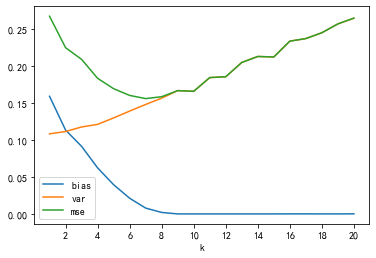

In [33]:
plt.plot(range(1, p+1), bias, label="bias")
plt.plot(range(1, p+1), var, label="var")
plt.plot(range(1, p+1), mse, label="mse")
plt.legend()
plt.xlabel("k")
plt.xticks([2 * i for i in range(1, 11)])
plt.show()

## 评述

从图中可以看出，MSE由Bias和Var两部分组成。

其中，Bias随k的增大而不断减小，Var随k的增大而不断增大。

在前期，Bias减小速率大于Var的增大速率，使得MSE呈现减小的趋势。

在后期，Bias的值逐渐趋近于0，减小速率变缓，小于Var的增大速率，使得MSE呈现增大的趋势。

在欠拟合的状态下：

模型方差较小，即模型较为稳定，但是代价是较低的模型准确度，因为在欠拟合的状态下模型预测偏差较大

在过拟合的状态下：

模型能够很好的拟合数据，得到的偏差较小。

但是此时模型的方差较大

即模型会随着其中的数据点的改变而出现巨大的变化，导致模型的稳定型较低，泛化能力较差。